## Google Stock Price Prediction
### Author:Gowri S


This is a time series forecasting problem.It is an attempt to forecast the future values by understanding the past values, and forecast te future.
Basic steps in forecasting
    *Problem statement
    *Gathering the information
    *Understanding the data
    *Choosing and Fitting the models
    *Evaluating the performance
    *Forecast the Future
    
 Stock data is a sequential data that is they need to be analysed according to the order by time.
 In Recurrent neural network RNN we are dealt with problem of vanishing gradient thus previous data will become less significant after long backpropagation.That is memory is not that deep.So we use Long short term memory LSTM.This is because stock prediction need long term memory 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tesla=pd.read_csv(r"C:\Users\hp\Desktop\real world problems data set\bharat intern\TSLA.csv")
tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
1,2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2,2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
3,2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
4,2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [3]:
tesla=pd.read_csv(r"C:\Users\hp\Desktop\real world problems data set\bharat intern\TSLA.csv",parse_dates=True,index_col='Date')
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 639 entries, 2019-09-30 to 2022-04-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       639 non-null    float64
 1   Low        639 non-null    float64
 2   Open       639 non-null    float64
 3   Close      639 non-null    float64
 4   Volume     639 non-null    float64
 5   Adj Close  639 non-null    float64
dtypes: float64(6)
memory usage: 34.9 KB


<Axes: xlabel='Date'>

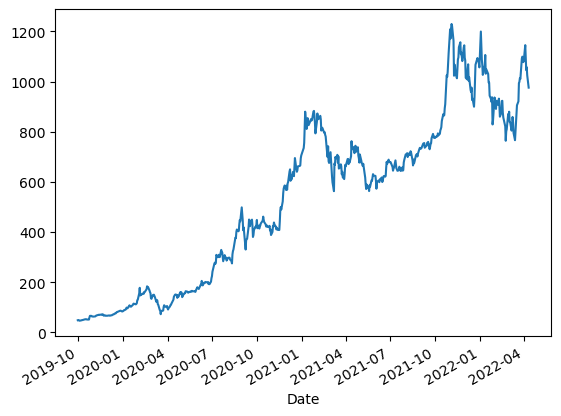

In [5]:
tesla['Close'].plot()

In [6]:
len(tesla)

639

In [7]:
tesla_close=tesla['Close']
tesla_close

Date
2019-09-30      48.174000
2019-10-01      48.938000
2019-10-02      48.625999
2019-10-03      46.605999
2019-10-04      46.285999
                 ...     
2022-04-05    1091.260010
2022-04-06    1045.760010
2022-04-07    1057.260010
2022-04-08    1025.489990
2022-04-11     975.929993
Name: Close, Length: 639, dtype: float64

In [8]:
tesla_close.reset_index(drop=True,inplace=True)
tesla_close

0        48.174000
1        48.938000
2        48.625999
3        46.605999
4        46.285999
          ...     
634    1091.260010
635    1045.760010
636    1057.260010
637    1025.489990
638     975.929993
Name: Close, Length: 639, dtype: float64

In [9]:
tesla_close=pd.DataFrame(tesla_close)
tesla_close

,Close
0,48.174000
1,48.938000
2,48.625999
3,46.605999
4,46.285999
...,...
634,1091.260010
635,1045.760010
636,1057.260010
637,1025.489990


In [10]:
training_data_len=int(np.ceil(len(tesla_close)*.95))
training_data_len

608

In [11]:
train=tesla_close.iloc[:training_data_len]
test=tesla_close.iloc[training_data_len:]

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
scaler.fit(train)

MinMaxScaler()

while we are applying scaling we need to split the data first and then apply scaling on the training data set and then we project the same on the test data set

In [15]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
#timeseriesgenerator helps us to transform the values and save it in an array format

In [17]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.preprocessing.sequence:

class TimeseriesGenerator(keras.src.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (su

### Creating Model

In [18]:
len(test)

31

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout

In [21]:
df_array=np.array(tesla_close)
df_array

array([[  48.17399979],
       [  48.93799973],
       [  48.62599945],
       [  46.60599899],
       [  46.2859993 ],
       [  47.54399872],
       [  48.00999832],
       [  48.90599823],
       [  48.94800186],
       [  49.57799911],
       [  51.39199829],
       [  51.57799911],
       [  51.95000076],
       [  52.39400101],
       [  51.38999939],
       [  50.70000076],
       [  51.11600113],
       [  50.93600082],
       [  59.93600082],
       [  65.62599945],
       [  65.54199982],
       [  63.24399948],
       [  63.0019989 ],
       [  62.98400116],
       [  62.66199875],
       [  63.49399948],
       [  63.44400024],
       [  65.31600189],
       [  67.10800171],
       [  67.4280014 ],
       [  69.01799774],
       [  69.98600006],
       [  69.22200012],
       [  69.87000275],
       [  70.43399811],
       [  69.9980011 ],
       [  71.90399933],
       [  70.44400024],
       [  70.96600342],
       [  66.60800171],
       [  67.26799774],
       [  65.783

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [23]:
length=(len(test))-1

In [24]:
scaled_test.shape

(31, 1)

In [25]:
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=14)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=14)

In [26]:
model2=Sequential()
model2.add(LSTM(30,input_shape=(length,1)))
model2.add(Dropout(rate=0.2))
model2.add(Dense(1))

In [27]:
model2.compile(optimizer='adam',loss='mse')

In [28]:
model2.fit_generator(generator,epochs=50,validation_data=validation_generator,shuffle=False)

Epoch 1/50


C:\Users\hp\AppData\Local\Temp\ipykernel_8848\100620966.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(generator,epochs=50,validation_data=validation_generator,shuffle=False)


42/42 [==============================] - 7s 44ms/step - loss: 0.0145 - val_loss: 0.0058
Epoch 2/50
42/42 [==============================] - 1s 19ms/step - loss: 0.0139 - val_loss: 4.4152e-04
Epoch 3/50
42/42 [==============================] - 1s 19ms/step - loss: 0.0087 - val_loss: 0.0011
Epoch 4/50
42/42 [==============================] - 1s 19ms/step - loss: 0.0081 - val_loss: 6.5252e-04
Epoch 5/50
42/42 [==============================] - 1s 19ms/step - loss: 0.0066 - val_loss: 0.0020
Epoch 6/50
42/42 [==============================] - 1s 19ms/step - loss: 0.0056 - val_loss: 0.0026
Epoch 7/50
42/42 [==============================] - 1s 19ms/step - loss: 0.0051 - val_loss: 0.0027
Epoch 8/50
42/42 [==============================] - 1s 19ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 9/50
42/42 [==============================] - 1s 19ms/step - loss: 0.0049 - val_loss: 0.0052
Epoch 10/50
42/42 [==============================] - 1s 19ms/step - loss: 0.0038 - val_loss: 0.0047
Epoch 11/50


<Axes: >

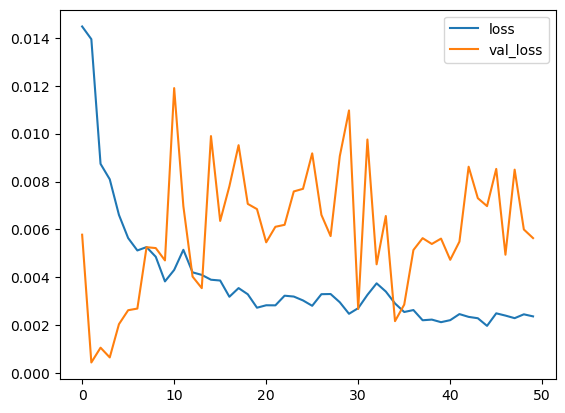

In [29]:
losses=pd.DataFrame(model2.history.history)
losses.plot()

In [30]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,1))
for i in range((len(test))):
    current_pred=model2.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
 

1/1 [==============================] - 0s 49ms/step


In [31]:
test_predictions

[array([0.6612512], dtype=float32),
 array([0.66118854], dtype=float32),
 array([0.66346586], dtype=float32),
 array([0.66773194], dtype=float32),
 array([0.67353433], dtype=float32),
 array([0.6804954], dtype=float32),
 array([0.6883064], dtype=float32),
 array([0.69671774], dtype=float32),
 array([0.7055269], dtype=float32),
 array([0.7145692], dtype=float32),
 array([0.7237041], dtype=float32),
 array([0.732818], dtype=float32),
 array([0.7418229], dtype=float32),
 array([0.7506425], dtype=float32),
 array([0.7592123], dtype=float32),
 array([0.767482], dtype=float32),
 array([0.7754141], dtype=float32),
 array([0.7829796], dtype=float32),
 array([0.7901589], dtype=float32),
 array([0.79693913], dtype=float32),
 array([0.8033116], dtype=float32),
 array([0.8092708], dtype=float32),
 array([0.81482], dtype=float32),
 array([0.8199681], dtype=float32),
 array([0.8247253], dtype=float32),
 array([0.82910156], dtype=float32),
 array([0.83311146], dtype=float32),
 array([0.836771], dtype

In [32]:
true_predictions=scaler.inverse_transform(test_predictions)
true_predictions

array([[ 828.95879771],
       [ 828.8846502 ],
       [ 831.58013457],
       [ 836.62957322],
       [ 843.49742499],
       [ 851.7366883 ],
       [ 860.98198733],
       [ 870.93786083],
       [ 881.36458163],
       [ 892.06729203],
       [ 902.87956579],
       [ 913.66700613],
       [ 924.32541146],
       [ 934.76447841],
       [ 944.90794301],
       [ 954.69612037],
       [ 964.08477597],
       [ 973.03948165],
       [ 981.53709719],
       [ 989.56231335],
       [ 997.10490044],
       [1004.15836791],
       [1010.72652544],
       [1016.81995546],
       [1022.45065137],
       [1027.63053603],
       [1032.37675298],
       [1036.70828003],
       [1040.64381279],
       [1044.20924292],
       [1047.4296155 ]])

In [33]:
test['LSTM_Predictions']=true_predictions
test

C:\Users\hp\AppData\Local\Temp\ipykernel_8848\177909352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM_Predictions']=true_predictions


,Close,LSTM_Predictions
608,870.429993,828.958798
609,864.369995,828.884650
610,879.890015,831.580135
611,839.289978,836.629573
612,838.289978,843.497425
613,804.580017,851.736688
614,824.400024,860.981987
615,858.969971,870.937861
616,838.299988,881.364582
617,795.349976,892.067292


<Axes: >

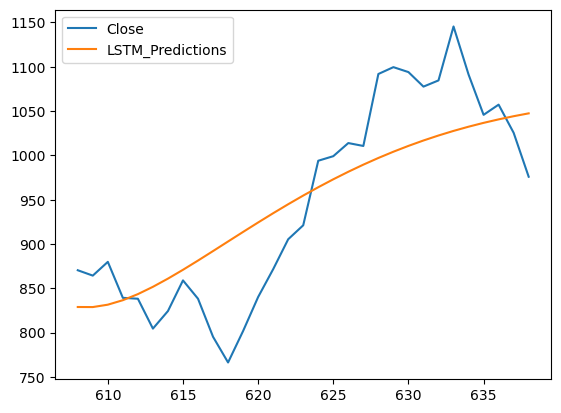

In [34]:
test.plot()

In [35]:
forcast2=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,1))
for i in range(len(test)):
    current_pred=model2.predict(current_batch)[0]
    forcast2.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 50ms/step


In [36]:
forcast2=scaler.inverse_transform(forcast2)

In [37]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forcast2.flatten())))
previouss_data=pd.DataFrame(df_array.flatten())
future_data=pd.DataFrame(forcast2.flatten())

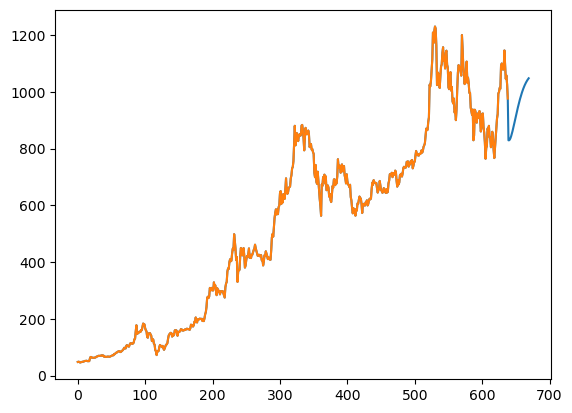

In [38]:
plt.plot(full_data,label='predicted')
plt.plot(previouss_data,label='original')